# Student Name: Xavier Geoffrey Niroopen
## Student ID: 23263806

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.creation import CyclicalFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

Load the bank Dataset for data exploration...

In [3]:
df = pd.read_csv('./bank.csv')

## Input variables available for the dataset:
   ## bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")


   ## related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

  
   ## other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
#Get an overall view from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [5]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [6]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

## Task 1

### 1a. Formulate a particular question that might be interesting to answer by exploring the bank dataset

Looking at the data briefly, I can observe the following:
- It has both Categorical and Numerical data. 
- There are a total of 2000 indices.
- There are missing values among the indices.
- Day and month are cyclical. These two can be merged to get a better sense.
- 'subscribed' is the final outcome.

Now for the question, a customer shall successfully `subscribe` to a term deposit `only` if there is a sufficient `balance` in their account. And once one subscribes, that entire money is locked in the bank until the maturity. So, this seems to be a major decision and my analysis shall revolve around balance and how it depends on the other variables.
But for concluding this hypothesis, one other major data is missing, i.e. the value of the term deposit. Let's explore the data more and then finalise.

### 1b. Calculate statistics for the numerical and categorical attributes. Draw a short conclusion 

In [7]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [8]:
df.describe(include=object)

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

In [9]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

Again looking at the balance(numerical) statistics:
- Yearly mean balance of 1414 euros is too small.
- Looking at the range of balance, it doens't feel like a normal distribution. This shall be confirmed by plotting later.
- But the standard deviation of 3000 euros seems sufficient enough. This also could be in the other direction i.e. negative balance
- There is a negative balance, so we shall observe the frequency to see how many have negative balances.
- Mean age is 42 and the standard deviation is 13. The population seems to be young and chances for a young population to subsribe looks bleak to me.
- Campaign doesn't look interesting as the subsrciption decision is made in one phone call. So I can conclude, that the customer is well versed with their finances?! and may be not
involve campaign much.

Now, let's look at the categorical statistics.
- There is a 50/50 subscription! Ok now, this is a shocker. Initial analysis doesn't hold that much becuase of this.
- There are mutliple missing data in the categorical data.

For my analysis around `balance`, I feel the following might be influencing more for a customer to subscribe: `age`, `job`, `housing` and `loan` 

### First, let's have a look at the frequency of negative balances

In [10]:
neg_bal_df = df[df['balance'] < 0]

# Get the count of rows with negative balances
count_negative_balances = neg_bal_df.shape[0]
print(f"Percentage of negative balances: {count_negative_balances/df['balance'].count() * 100}% ")

Percentage of negative balances: 4.65% 


So, we have a mere 5% of the customer with negative balance. But whereas, half of the customer have `no` subscription. So, not much influence.

In [11]:
#descriptive statistics summary
df['balance'].describe()

count     2000.000000
mean      1413.663500
std       3131.224213
min       -980.000000
25%        201.500000
50%        551.000000
75%       1644.500000
max      81204.000000
Name: balance, dtype: float64

### 1c. Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions

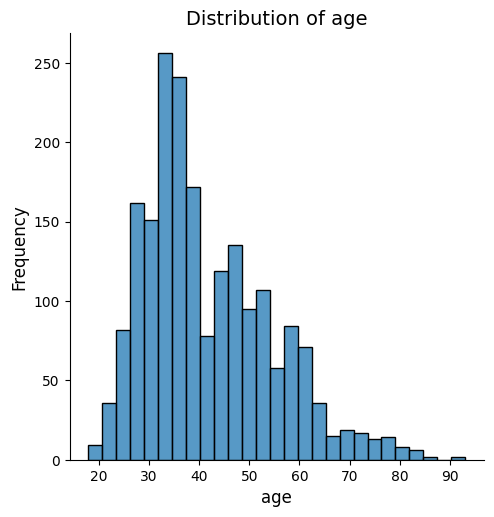

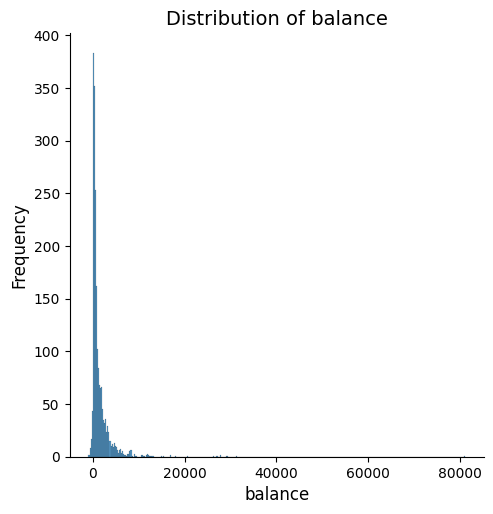

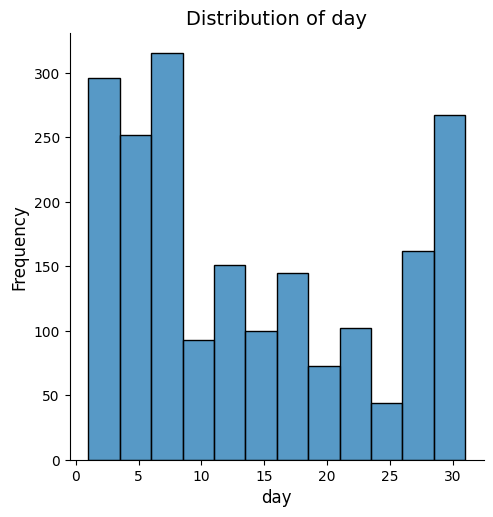

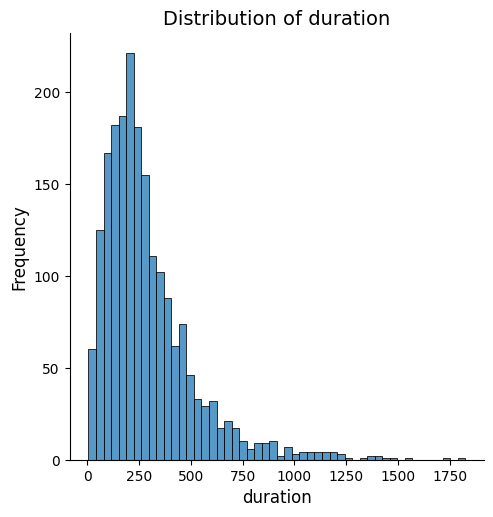

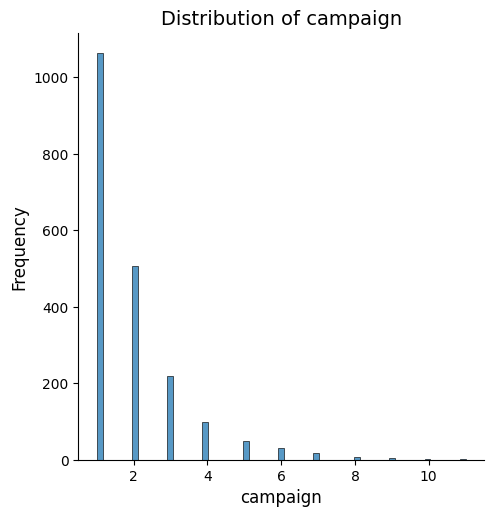

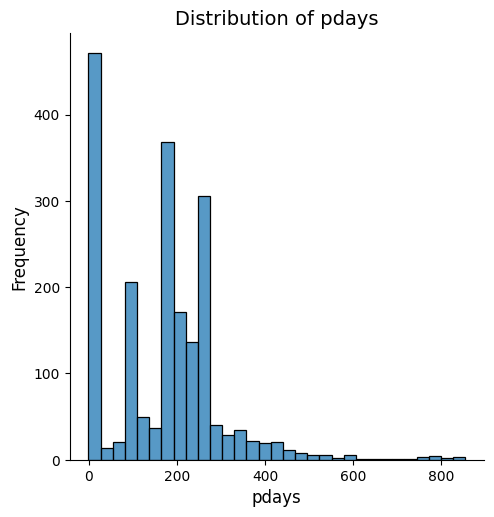

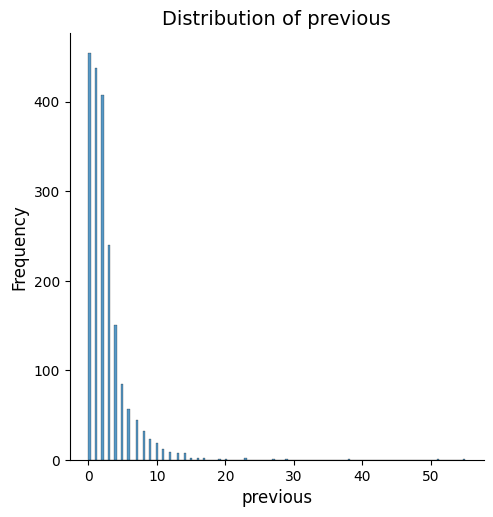

In [12]:
for column in numerical_columns:
    sns.displot(df[column])
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

The distribution plot of balance:
- Definitely not a normal distribution. It confirms what we saw in its statistics info.
- It is highly positively skewed 
- It has a very sharp peakness(kurtosis)

The distribution other plots:
- pdays and days are not close to normal distribution
- previous, campaign and duration have normal distribution with skewness

### What does skewness tells us?
- Skewness measures the asymmetry of the probability distribution.
- A skewness value of 0 indicates a perfectly symmetrical distribution.
- Positive skewness (right-skewed) means the tail of the distribution is longer on the right side.
- Negative skewness (left-skewed) means the tail of the distribution is longer on the left side.

In [13]:
print(f"Skewness: {df['balance'].skew()}")

Skewness: 11.461564406584934


### What does kurtosis tells us?
- Kurtosis measures the peakness of the probability distribution.
- A kurtosis value of 3 indicates the same peakedness as a normal distribution.
- Positive kurtosis means the distribution has fatter tails and a sharper peak than the normal distribution.
- Negative kurtosis means the distribution has thinner tails and a flatter peak than the normal distribution.

In [14]:
print(f"Peakness: {df['balance'].kurt()}")

Peakness: 231.85607380185758


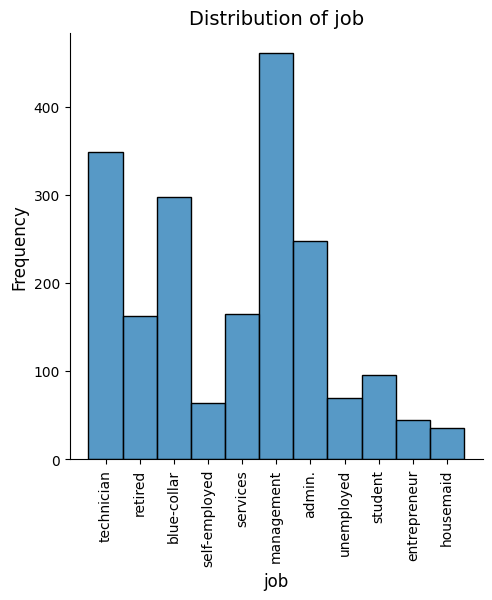

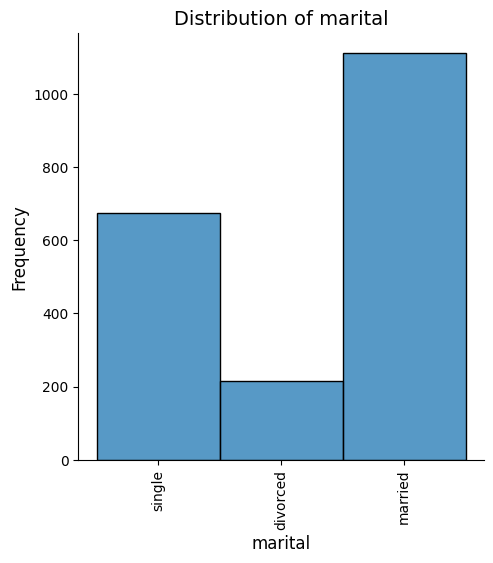

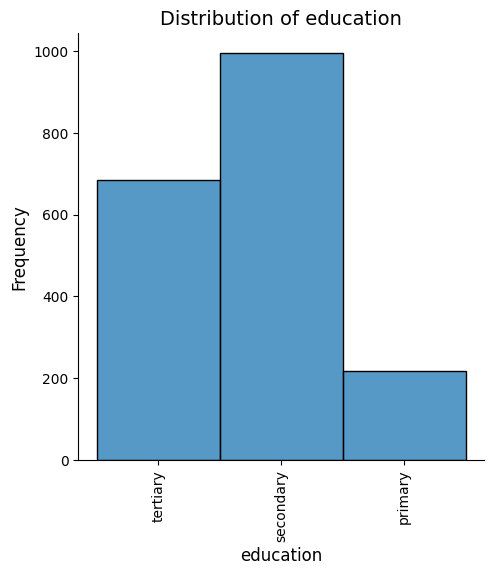

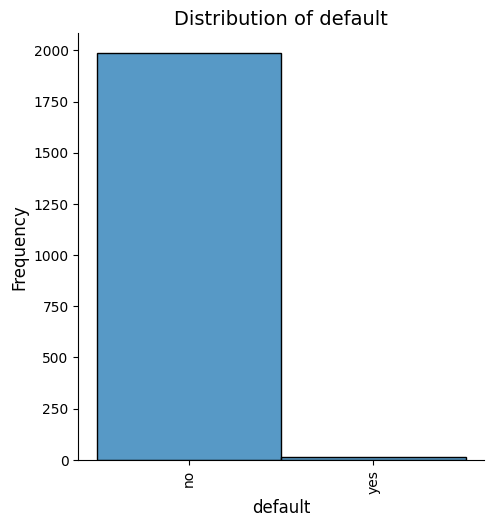

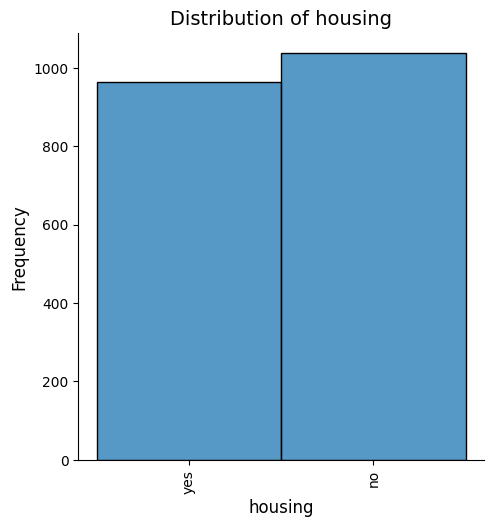

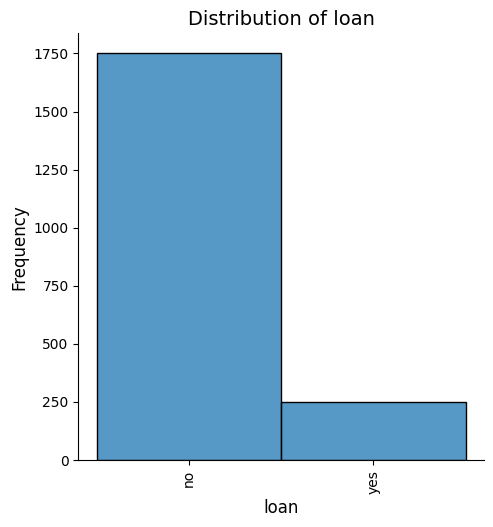

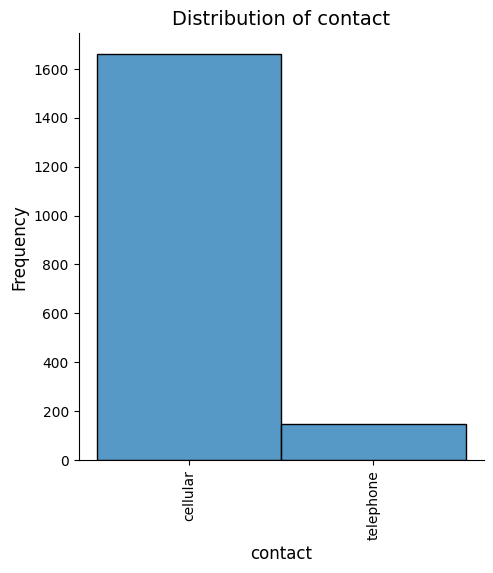

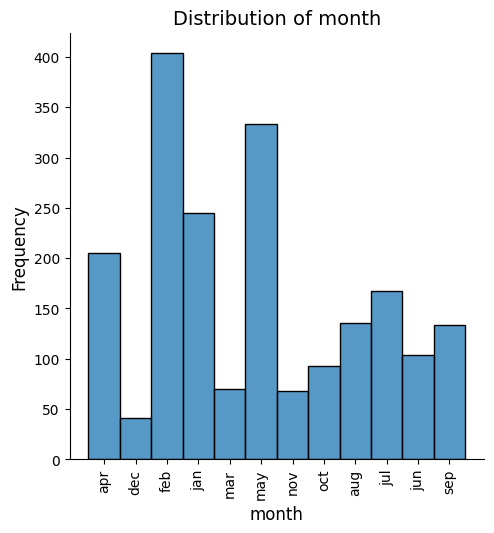

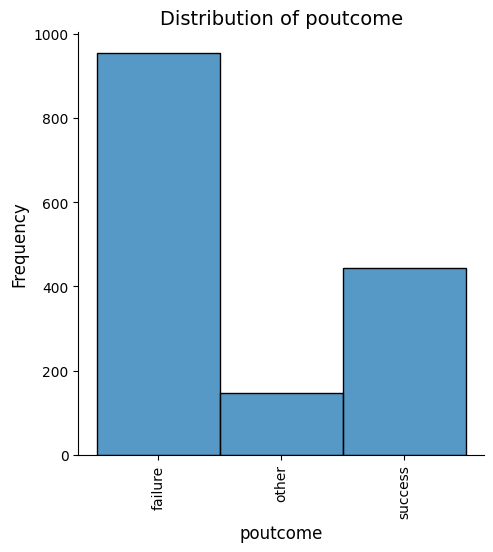

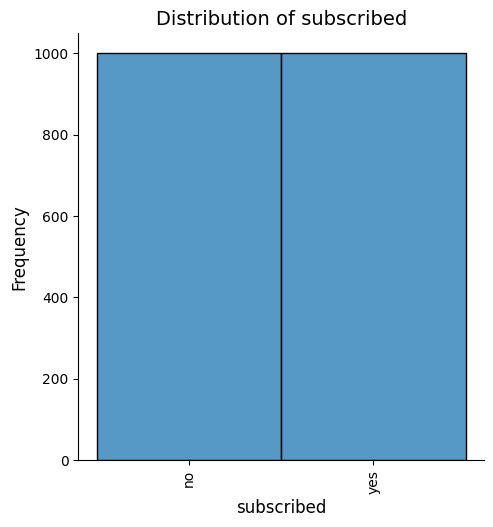

In [15]:
for column in categorical_columns:
    sns.displot(df[column])
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

- Management and technician are the highest number of jobs among the customers.
- Almost, half of the customers have housing loan
- Most of the customers have no loan, a good sign.
- Also, almost no one has defaults, another good sign.
- Half of the customers previous campaign is a failure

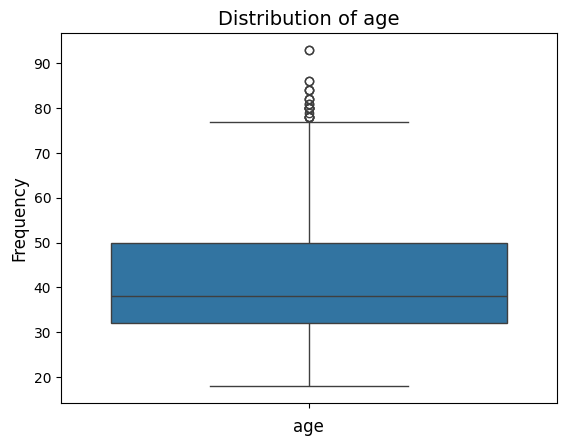

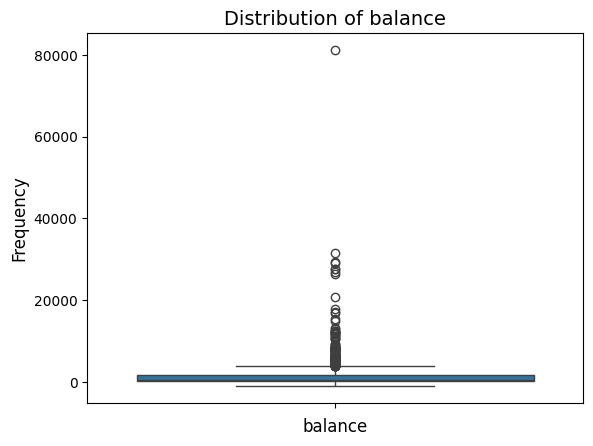

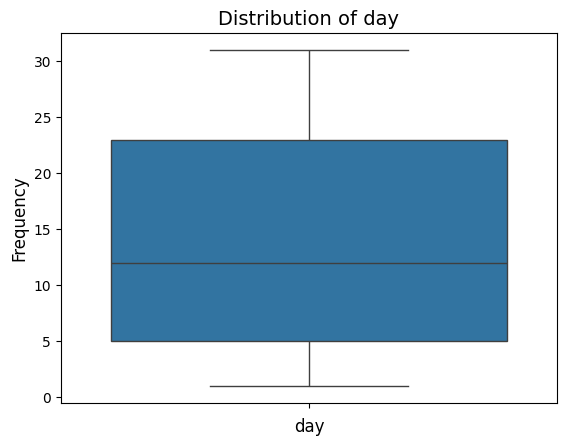

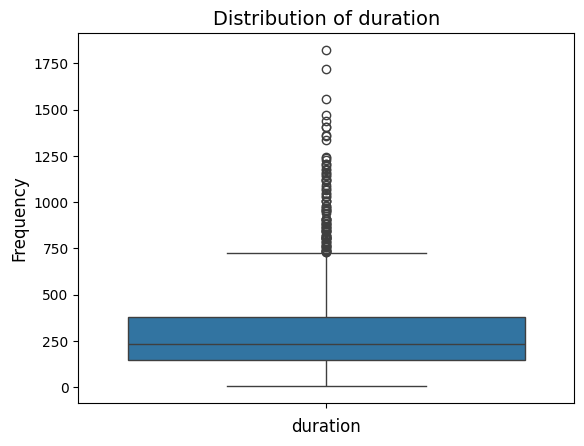

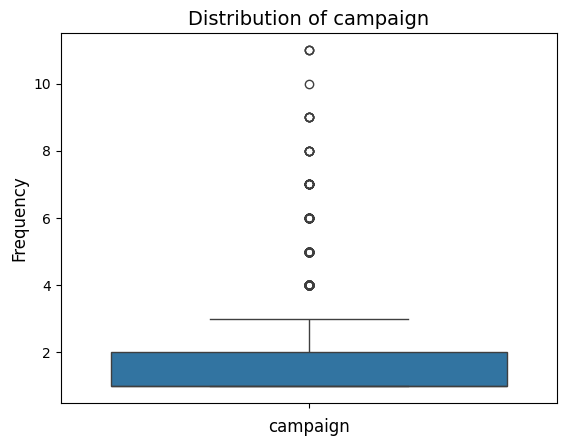

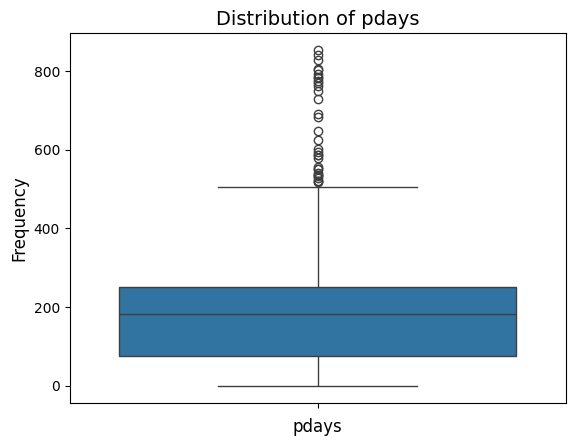

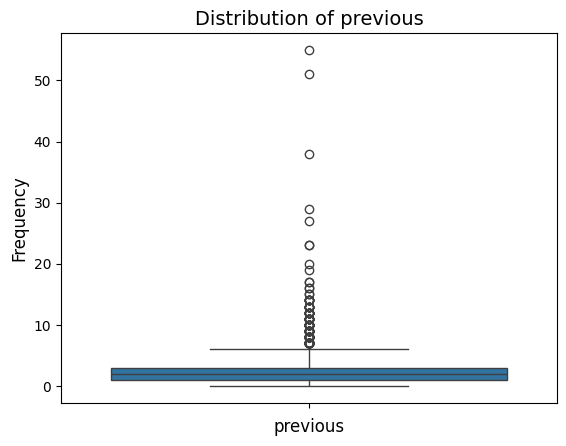

In [16]:
for column in numerical_columns:
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

- balance, duration, previous have many outliers

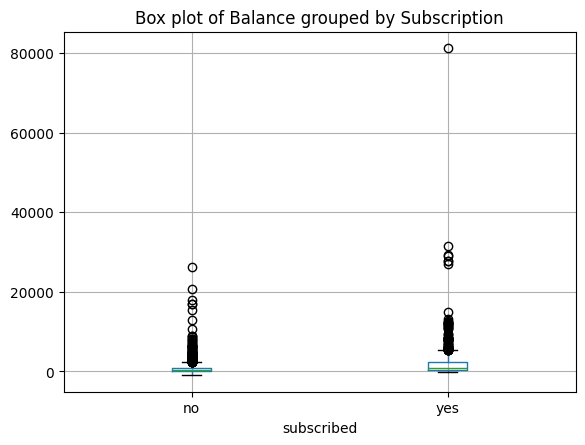

In [17]:
# Boxp lots of balance, grouped by the categorical attribute subscribed
df.boxplot(column='balance', by='subscribed')
plt.title('Box plot of Balance grouped by Subscription')
plt.suptitle("")
plt.show()

- Balance has a lot of outliers
- The notion of sufficient balance for subscription doesn't seem to hold well.
- But still, let's plot age, job and loans to analyse further

<Axes: xlabel='age', ylabel='balance'>

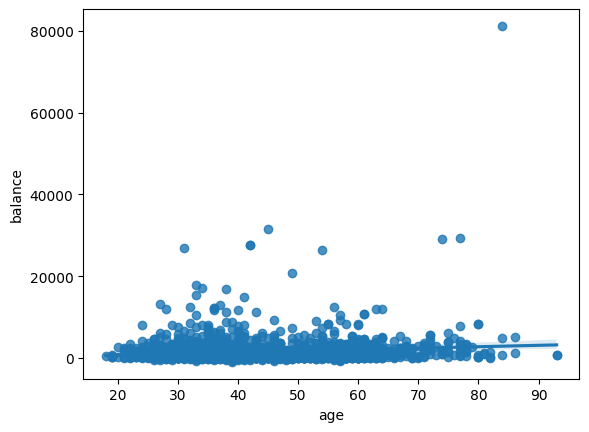

In [18]:
#scatter plot age vs balance
data = pd.concat([df['balance'], df['age']], axis=1)
sns.regplot(data=df, x='age', y='balance')

There is no linear relationship. Seems to be uniform distribution?

Anyone subscribed with negative balance?

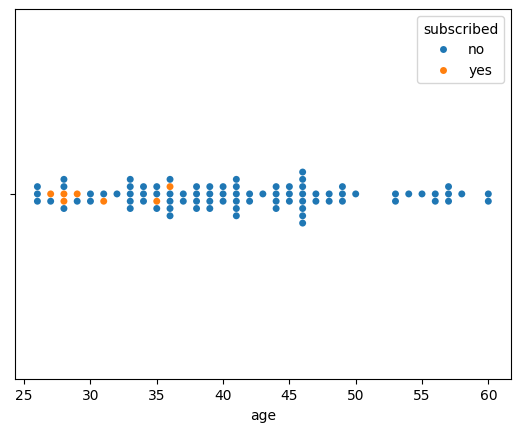

In [19]:
sns.swarmplot(data=df[df['balance'] < 0], x='age', hue="subscribed")
plt.show()

This confirms the distribution plot. Customers across ages seems have to some balance and also I am concluding anything above 20000 has outliers.
And obviously, customers with negative balances have mostly not subscribed.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'technician'),
  Text(1, 0, 'retired'),
  Text(2, 0, 'blue-collar'),
  Text(3, 0, 'self-employed'),
  Text(4, 0, 'services'),
  Text(5, 0, 'management'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'student'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'housemaid')])

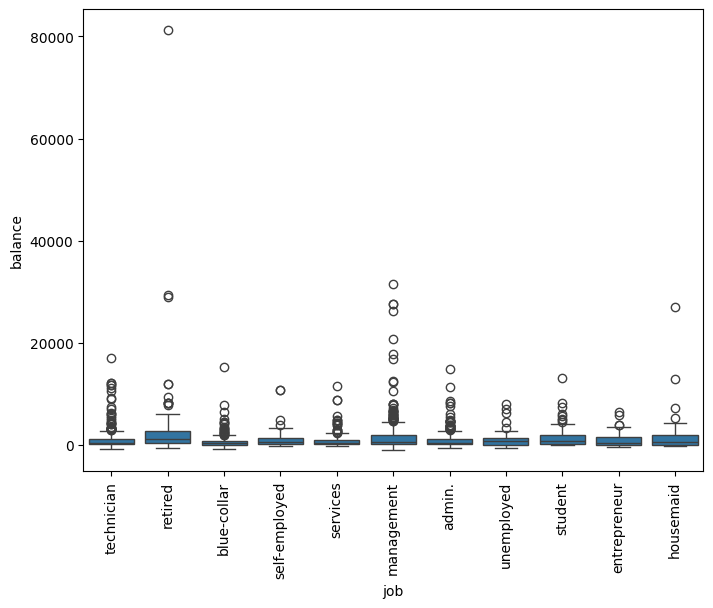

In [20]:
#box plot job vs balance 
data = pd.concat([df['balance'], df['job']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='job', y='balance', data=data)
plt.xticks(rotation=90)


In [21]:
df.groupby('subscribed')['job'].value_counts()

subscribed  job          
no          blue-collar      221
            management       210
            technician       204
            admin.           117
            services         115
            entrepreneur      30
            self-employed     29
            retired           26
            unemployed        21
            housemaid         15
            student            9
yes         management       251
            technician       144
            retired          136
            admin.           130
            student           87
            blue-collar       77
            services          50
            unemployed        48
            self-employed     35
            housemaid         20
            entrepreneur      15
Name: count, dtype: int64

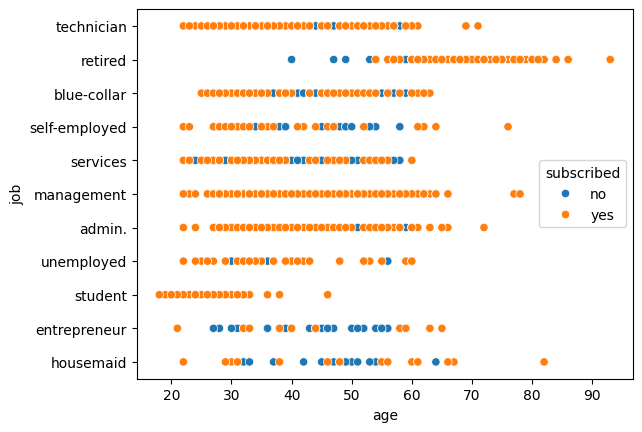

In [22]:
sns.scatterplot(x="age", y="job", hue="subscribed",data=df)
plt.show()

- Entreprenuers and housemaids don't subsribe much. 
- Half of management, self-employed customers are subscribed
- Interstingly, students are subscribed.

Now let's plot a heatmap and see.

<Axes: >

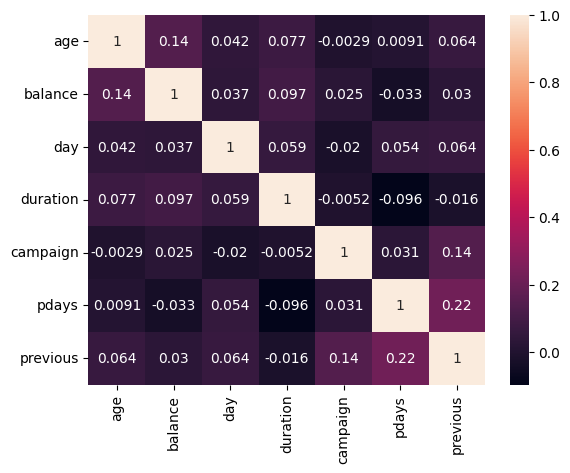

In [24]:
#correlation matrix

#create a dataframe with only the numeric columns since heatmap doesn't work with string data. This is for initial analysis,
#so it is fine to ignore the categorical data.
number_only_df = df.select_dtypes(include=['number'])
sns.heatmap(number_only_df.corr(), annot=True)

### How to interpret the correlation matrix?
- 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well. 
- 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
- -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.
- 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

### My Interpretation:
- There are no much correlation between any of the numerical data.
- Balance with age has the highest(among my variables) but a mere 0.14 :(
- Also, pdays has a slight higher value of 0.22. Maybe this previous contact has some positive effect?!

Now, let's plot the pairplot and I will include pdays based on the above observation and see how it pans out.

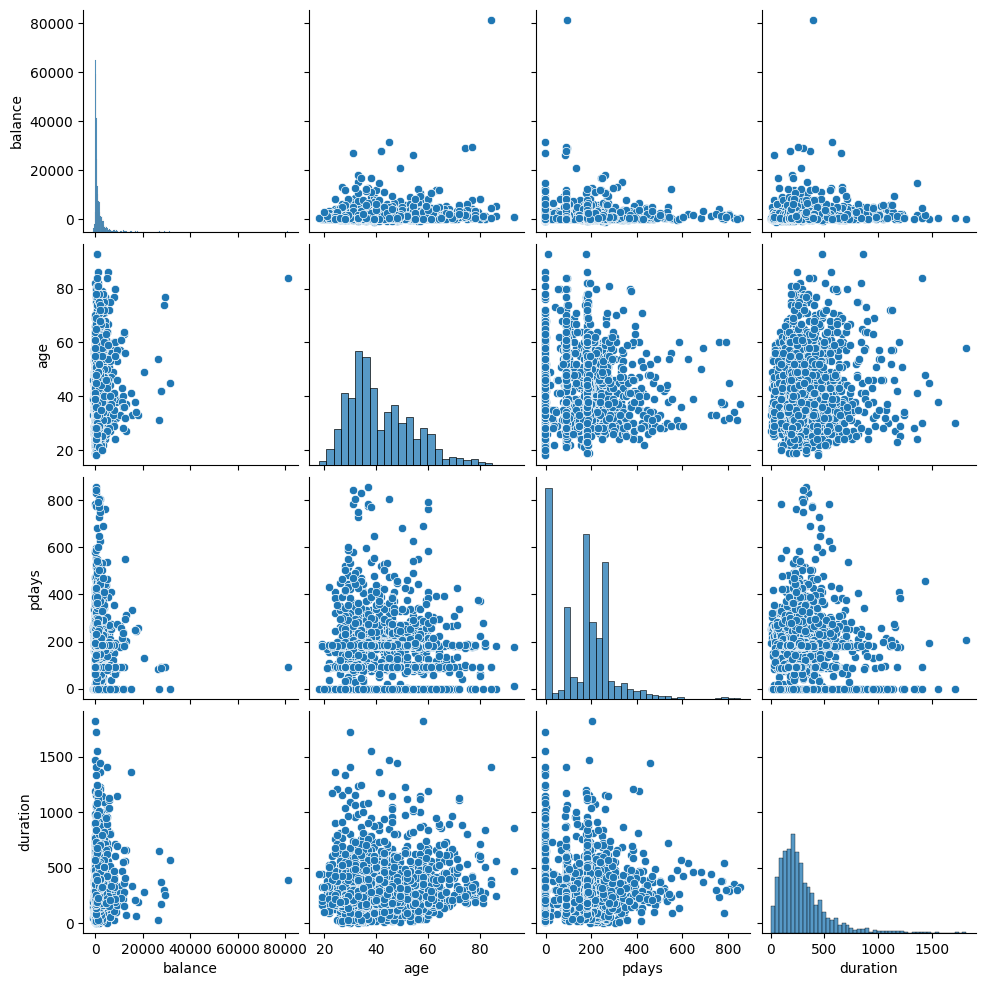

In [25]:
sns.pairplot(data=df[['balance','age','job','housing','loan', 'pdays', 'poutcome', 'duration']])
plt.show()

<Axes: xlabel='age', ylabel='pdays'>

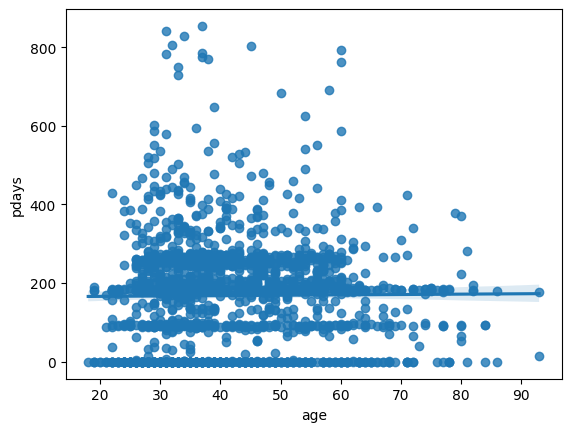

In [97]:
sns.regplot(data=df, x='age', y='pdays')

<Axes: xlabel='age', ylabel='duration'>

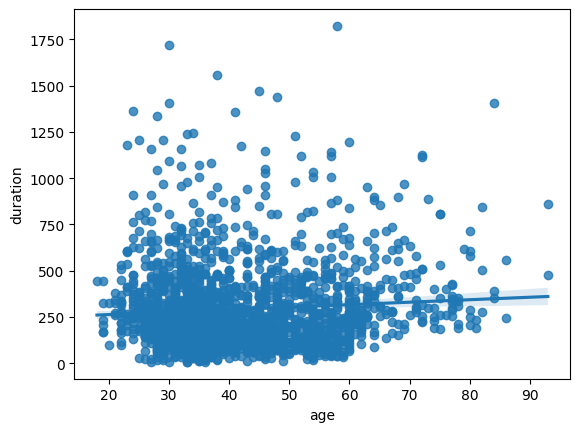

In [27]:
sns.regplot(data=df, x='age', y='duration')

- None of the plots seem to be linearly dependent.

### 1d. Generate at least two plots with the combined distribution of attributes. Draw a short conclusion

For the combined distribution, since my hypothesis is based on the balance, let's see how the `balance` stack up against `marital` and `loan`.Let's also look into the frequency of each to get some insight first.

In [28]:
df['marital'].value_counts()

marital
married     1111
single       674
divorced     215
Name: count, dtype: int64

In [29]:
df['housing'].value_counts()

housing
no     1037
yes     963
Name: count, dtype: int64

In [30]:
df['loan'].value_counts()

loan
no     1750
yes     250
Name: count, dtype: int64

- I am assuming that being married and divorced makes one to save more.
- And around 66% are married and divorced
- Also around 50% has housing loan. This is a good loan, need to see marital and housing subscription combination.
- On the other hand, loan customer is around 12%. Let see how this also stack up.

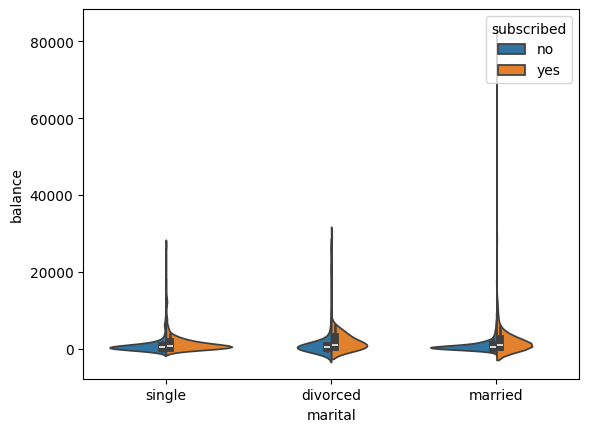

In [31]:
sns.violinplot(data=df, x='marital', y='balance', hue='subscribed', split=True)
plt.show()

- Married and divorced individuals have a normal distribution, knows the value of savings, maybe.
- While singles are less prone to savings

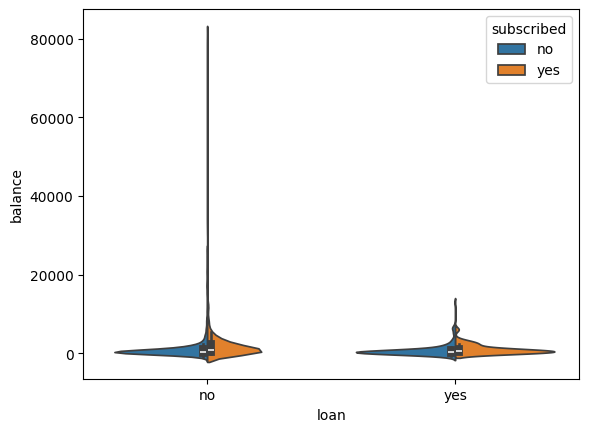

In [32]:
sns.violinplot(data=df, x='loan', y='balance', hue='subscribed', split=True)
plt.show()

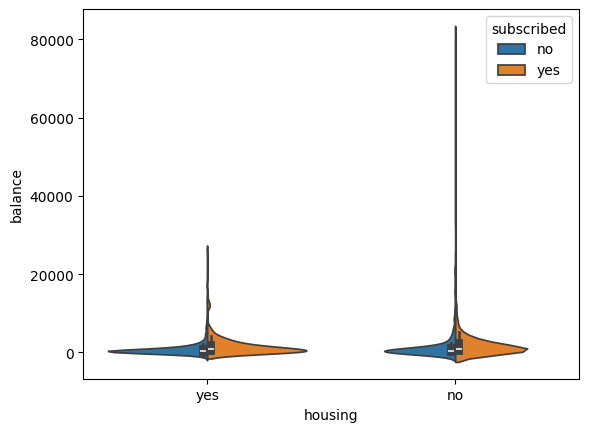

In [33]:
sns.violinplot(data=df, x='housing', y='balance', hue='subscribed', split=True)
plt.show()

From the above loan and housing plots, it seems that customers with no loans are prone to subscribing for term deposit.
Let's build a pivot table for  both the loans and `subscribed` and confirm the above.

In [34]:
pivot_table_loan_sub = df.pivot_table(values='subscribed',
                                index='loan',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

print(pivot_table_loan_sub)

      subscribed
loan            
no      0.546857
yes     0.172000


In [35]:
pivot_table_housing_sub = df.pivot_table(values='subscribed',
                                index='housing',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

print(pivot_table_housing_sub)

         subscribed
housing            
no         0.768563
yes        0.210800


There is a subsription success rate of 54% and 77% with customers who has no personal and housing loans.

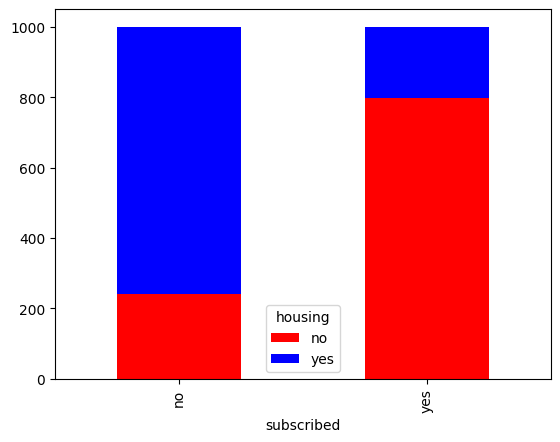

In [98]:
crosstab_SH = pd.crosstab(df['subscribed'], df['housing'])
crosstab_SH.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.show()

Cross tab plot clearly shows the above conclusion.

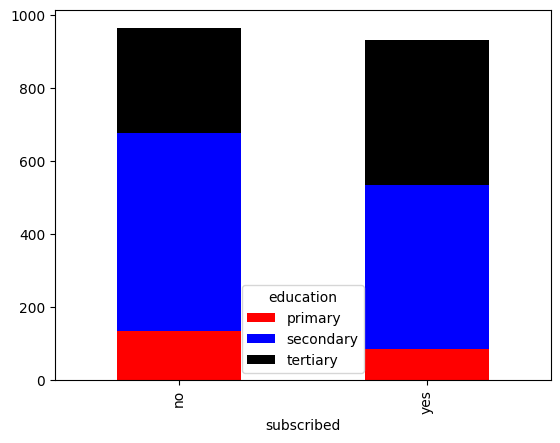

In [102]:
crosstab_SL = pd.crosstab(df['subscribed'], df['education'])
crosstab_SL.plot(kind='bar', stacked=True, color=['red', 'blue', 'black'])
plt.show()

- Both no and yes subscription spread across education seems equally spread.

# Task 2

- encoded all categorical attributes as numerical,
- filled in all missing values,
- applied a scaler to rescale features,
- treated outliers and skewed attribute distribution appropriately,
- created at least one new feature from the existing ones.

In [37]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [38]:
df_copy = df.copy()

### 2a. Treating outliers

`balance` has a lot of outliers and also the data is very skewed towards right. Let's see what can be done.

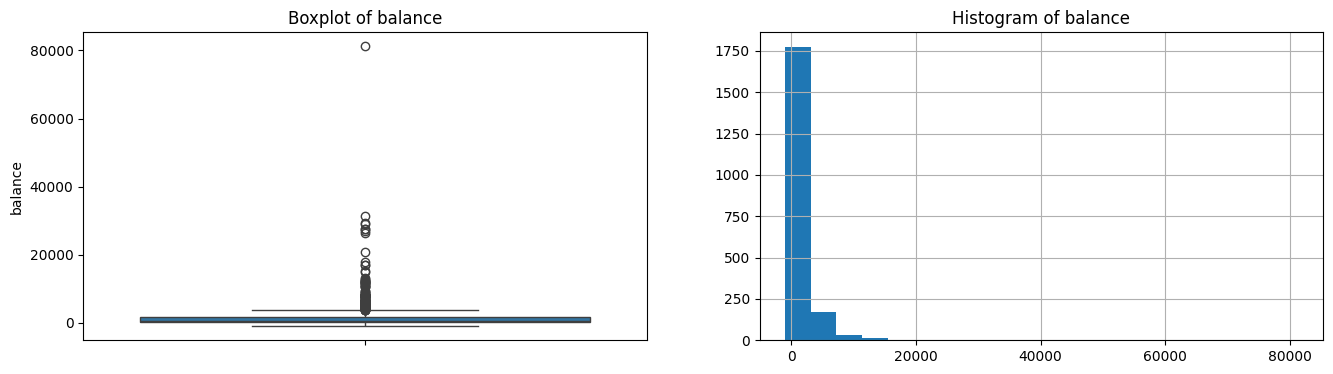

In [39]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# BoxPlot balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Boxplot of balance")
sns.boxplot(df_copy['balance'])

# Plot distribution plot of balance
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of balance")
df_copy['balance'].hist(bins=20)
plt.show()

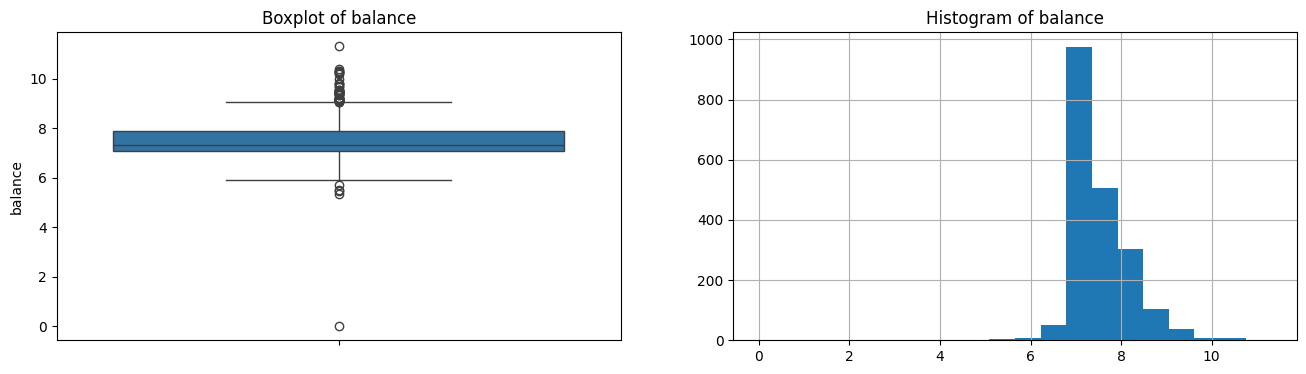

In [40]:
# Use a log transformation to decrease the impact of outliers
df_copy['balance'] = np.log(df_copy['balance'] + abs(min(df_copy['balance'])) + 1)

# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# BoxPlot balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Boxplot of balance")
sns.boxplot(df_copy['balance'])

# Plot distribution plot of balance
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of balance")
df_copy['balance'].hist(bins=20)

plt.show()

In [41]:
percentile_balance = df_copy['balance'].sort_values().quantile([0.25, 0.5, 0.75, 1.0])
print(percentile_balance)
q25, q50, q75, q100 = percentile_balance[[0.25, 0.5, 0.75, 1.0]]
iqr_balance = q75 - q25
print(f"IQR: {iqr_balance}")
# calculate the outlier cutoff
iqr_balance_cutoff = iqr_balance * 1.5
print(f"IQR_Cutoff: {iqr_balance_cutoff}")
lower_balance, upper_balalnce = q25 - iqr_balance_cutoff, q75 + iqr_balance_cutoff
print(f"IQR_low: {lower_balance} IQR_high: {upper_balalnce}")

# identify outliers
balance_outliers = [x for x in df_copy['balance'] if x < lower_balance or x > upper_balalnce]
print(f"Identified outliers: {len(balance_outliers)}")
# remove outliers
outliers_removed = [x for x in df_copy['balance'] if x >= lower_balance and x <= upper_balalnce]

0.25     7.075386
0.50     7.334329
0.75     7.873027
1.00    11.316728
Name: balance, dtype: float64
IQR: 0.7976407266575469
IQR_Cutoff: 1.1964610899863204
IQR_low: 5.878924762046811 IQR_high: 9.069487668676999
Identified outliers: 56


- Based on the task 1 plot, `balance` is heavily skewed.
- It also has negative values, so applied log transformation by adding a constant to `balance` reducing the skewness and that also reduced the outliers. I was able to demonstrate how to identify the outliers but they can't be blindly removed. I will keep them and do the other exercices.

### 2b. Remove or fill in the missing values

In [42]:
df_copy.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

- About 25% of poutcome is missing, so I will remove this.
- Contact doesn't add much value to the analysis and so this will also be removed.

In [43]:
columns_to_drop = ['poutcome', 'contact']

# Drop the specified columns
df_copy = df_copy.drop(columns=columns_to_drop, axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   float64
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   day         2000 non-null   int64  
 9   month       2000 non-null   object 
 10  duration    2000 non-null   int64  
 11  campaign    2000 non-null   int64  
 12  pdays       2000 non-null   int64  
 13  previous    2000 non-null   int64  
 14  subscribed  2000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


In [44]:
df_copy.describe()

age      balance          day     duration     campaign  \
count  1988.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018     7.510875    13.851500   292.020500     1.909500   
std      12.724358     0.651886     9.712189   221.557295     1.378862   
min      18.000000     0.000000     1.000000     7.000000     1.000000   
25%      32.000000     7.075386     5.000000   146.000000     1.000000   
50%      38.000000     7.334329    12.000000   236.000000     1.000000   
75%      50.000000     7.873027    23.000000   379.000000     2.000000   
max      93.000000    11.316728    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [45]:
df_copy.describe(include=object)

job  marital  education default housing  loan month subscribed
count         1990     2000       1896    2000    2000  2000  2000       2000
unique          11        3          3       2       2     2    12          2
top     management  married  secondary      no      no    no   feb         no
freq           461     1111        995    1985    1037  1750   404       1000

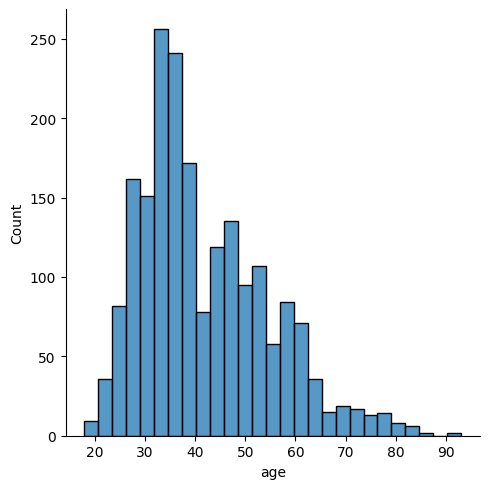

In [46]:
sns.displot(df_copy['age'])

In [47]:
nan_indices = df[df['age'].isnull()].index
print(nan_indices)
for idx in nan_indices:
    job = df.loc[idx, 'job']
    print(f"Job of '{job}' at index {idx}")

Index([456, 472, 526, 595, 597, 601, 605, 744, 795, 1171, 1232, 1408], dtype='int64')
Job of 'self-employed' at index 456
Job of 'blue-collar' at index 472
Job of 'services' at index 526
Job of 'management' at index 595
Job of 'self-employed' at index 597
Job of 'admin.' at index 601
Job of 'management' at index 605
Job of 'management' at index 744
Job of 'technician' at index 795
Job of 'retired' at index 1171
Job of 'student' at index 1232
Job of 'self-employed' at index 1408


In [48]:
df_copy.groupby('job').describe()

age                                                      \
               count       mean        std   min   25%   50%   75%   max   
job                                                                        
admin.         246.0  40.910569  10.157139  22.0  33.0  39.0  48.0  72.0   
blue-collar    297.0  39.754209   9.340600  25.0  33.0  38.0  46.0  63.0   
entrepreneur    45.0  43.733333  10.888693  21.0  36.0  44.0  54.0  65.0   
housemaid       35.0  47.314286  13.457496  22.0  35.0  48.0  55.0  82.0   
management     458.0  40.196507  10.026913  22.0  33.0  37.0  47.0  78.0   
retired        161.0  67.049689   8.954609  40.0  60.0  67.0  73.0  93.0   
self-employed   61.0  39.655738  12.228226  22.0  30.0  35.0  48.0  76.0   
services       164.0  38.170732   8.993938  22.0  31.0  36.0  45.0  60.0   
student         95.0  25.673684   4.420557  18.0  23.0  25.0  28.0  46.0   
technician     347.0  40.293948   9.781724  22.0  33.0  38.0  47.5  71.0   
unemployed      69.0  39.405797   9.895511  22.0  32.0  39.0  43.0  60.0   

              balance            ...   pdays        previous            \
                count      mean  ...     75%    max    count      mean   
job                              ...                                     
admin.          247.0  7.464766  ...  259.00  690.0    247.0  2.546559   
blue-collar     298.0  7.293487  ...  260.00  828.0    298.0  2.221477   
entrepreneur     45.0  7.462129  ...  227.00  414.0     45.0  2.177778   
housemaid        35.0  7.641037  ...  197.50  842.0     35.0  2.542857   
management      461.0  7.604546  ...  248.00  854.0    461.0  3.010846   
retired         162.0  7.822880  ...  189.50  792.0    162.0  2.777778   
self-employed    64.0  7.507060  ...  251.25  521.0     64.0  2.406250   
services        165.0  7.430595  ...  259.00  761.0    165.0  2.133333   
student          96.0  7.645103  ...  184.00  535.0     96.0  1.989583   
technician      348.0  7.455133  ...  251.25  805.0    348.0  2.637931   
unemployed       69.0  7.488836  ...  256.00  749.0     69.0  2.492754   

                                                     
                    std  min   25%  50%   75%   max  
job                                                  
admin.         2.940615  0.0  1.00  2.0  3.00  17.0  
blue-collar    2.518205  0.0  0.25  2.0  3.00  16.0  
entrepreneur   2.249130  0.0  0.00  2.0  3.00   9.0  
housemaid      2.923966  0.0  1.00  2.0  3.00  14.0  
management     4.197553  0.0  1.00  2.0  4.00  51.0  
retired        2.990669  0.0  1.00  2.0  4.00  20.0  
self-employed  2.258801  0.0  1.00  2.0  3.25  10.0  
services       2.735345  0.0  1.00  1.0  3.00  23.0  
student        2.434380  0.0  0.00  1.0  3.00  10.0  
technician     4.172222  0.0  1.00  2.0  3.00  55.0  
unemployed     3.075631  0.0  1.00  2.0  3.00  14.0  

[11 rows x 56 columns]

- Based on the above data, I will set the age of retired of student to their respective mean value, since they are just one
- Other ages, seems to be around the overall mean, so I will set them to the overall mean value

In [49]:
df_copy.loc[(df['age'].isnull()) & (df['job'] == 'retired'), 'age'] = df[df['job'] == 'retired']['age'].mean()
df_copy.loc[(df['age'].isnull()) & (df['job'] == 'student'), 'age'] = df[df['job'] == 'student']['age'].mean()

In [50]:
df_copy['age'].fillna(df['age'].mean(), inplace=True)
df_copy[df_copy['age'].isnull()]

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\2977613986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['age'].fillna(df['age'].mean(), inplace=True)


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, day, month, duration, campaign, pdays, previous, subscribed]
Index: []

In [51]:
nan_indices = df[df['job'].isnull()].index
print(nan_indices)
for idx in nan_indices:
    edu = df.loc[idx, 'education']
    bal = df.loc[idx, 'balance']
    print(f"Education of '{edu}' and balance is {bal} at index {idx}")

Index([255, 257, 831, 1223, 1281, 1669, 1711, 1801, 1868, 1975], dtype='int64')
Education of 'primary' and balance is 2398 at index 255
Education of 'nan' and balance is 677 at index 257
Education of 'primary' and balance is 2398 at index 831
Education of 'secondary' and balance is 2206 at index 1223
Education of 'nan' and balance is 558 at index 1281
Education of 'secondary' and balance is 2206 at index 1669
Education of 'nan' and balance is 397 at index 1711
Education of 'nan' and balance is 326 at index 1801
Education of 'nan' and balance is 1819 at index 1868
Education of 'tertiary' and balance is 406 at index 1975


In [52]:
df['job'].value_counts()

job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64

In [53]:
df[(df['balance'] < 2500) & (df['balance'] > 500)].describe()

age      balance         day     duration    campaign  \
count  735.000000   740.000000  740.000000   740.000000  740.000000   
mean    42.034014  1212.156757   14.268919   303.121622    1.920270   
std     13.259522   559.627471    9.576378   227.812362    1.329531   
min     19.000000   502.000000    1.000000     8.000000    1.000000   
25%     32.000000   701.250000    5.000000   155.750000    1.000000   
50%     39.000000  1089.000000   13.000000   248.000000    1.000000   
75%     51.000000  1672.500000   23.000000   384.250000    2.000000   
max     93.000000  2498.000000   31.000000  1556.000000   11.000000   

            pdays    previous  
count  740.000000  740.000000  
mean   172.577027    2.648649  
std    137.943020    3.104985  
min     -1.000000    0.000000  
25%     87.000000    1.000000  
50%    182.000000    2.000000  
75%    252.000000    4.000000  
max    805.000000   29.000000

Since, management has the highest count, I will replace the missing values with that.

In [54]:
df_copy['job'].fillna('management',inplace=True)
df_copy[df_copy['job'].isnull()]

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\2088472577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['job'].fillna('management',inplace=True)


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, day, month, duration, campaign, pdays, previous, subscribed]
Index: []

In [55]:
nan_indices = df[df['education'].isnull()].index
print(len(nan_indices))

104


In [56]:
df_copy['education'].value_counts()

education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64

I am not sure what value to set among the 3, since the missing values are more, I will create a new category `unknown`.

In [57]:
df_copy['education'].fillna('unknown',inplace=True)
df_copy[df_copy['education'].isnull()]

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\2759917525.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['education'].fillna('unknown',inplace=True)


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, day, month, duration, campaign, pdays, previous, subscribed]
Index: []

In [58]:
df_copy.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
subscribed    0
dtype: int64

### 2c. Encode the Categorical values

In [59]:
df_copy.head()

age          job   marital  education default   balance housing loan  day  \
0  32.0   technician    single   tertiary      no  7.224753     yes   no    1   
1  39.0   technician  divorced  secondary      no  7.419980     yes  yes    1   
2  59.0      retired   married  secondary      no  7.608871     yes  yes    1   
3  47.0  blue-collar   married  secondary      no  7.229114     yes  yes    1   
4  54.0      retired   married  secondary      no  7.593374     yes   no    1   

  month  duration  campaign  pdays  previous subscribed  
0   apr       957         2    131         2         no  
1   apr       233         2    133         1         no  
2   apr       126         2    239         1         no  
3   apr       274         1    238         2         no  
4   apr       479         1    307         1         no

Map the default, loans and subscription to 1 and 0 for yes and no respectively

In [60]:
scale_mapper = {
    "no": 0,
    "yes": 1
}

df_copy['default'] = df_copy['default'].replace(scale_mapper)
df_copy['housing'] = df_copy['housing'].replace(scale_mapper)
df_copy['loan'] = df_copy['loan'].replace(scale_mapper)
df_copy['subscribed'] = df_copy['subscribed'].replace(scale_mapper)

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\1475424511.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['default'] = df_copy['default'].replace(scale_mapper)
C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\1475424511.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['housing'] = df_copy['housing'].replace(scale_mapper)
C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\1475424511.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [61]:
df_copy.head(5)

age          job   marital  education  default   balance  housing  loan  \
0  32.0   technician    single   tertiary        0  7.224753        1     0   
1  39.0   technician  divorced  secondary        0  7.419980        1     1   
2  59.0      retired   married  secondary        0  7.608871        1     1   
3  47.0  blue-collar   married  secondary        0  7.229114        1     1   
4  54.0      retired   married  secondary        0  7.593374        1     0   

   day month  duration  campaign  pdays  previous  subscribed  
0    1   apr       957         2    131         2           0  
1    1   apr       233         2    133         1           0  
2    1   apr       126         2    239         1           0  
3    1   apr       274         1    238         2           0  
4    1   apr       479         1    307         1           0

Education is Ordinal with primary, secondary and tertiary categories.

In [62]:
df_copy['education'].value_counts()

education
secondary    995
tertiary     684
primary      217
unknown      104
Name: count, dtype: int64

In [63]:
edu_mapper = {
    "unknown": 0,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df_copy['education'] = df_copy['education'].replace(edu_mapper)

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\3738096230.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['education'] = df_copy['education'].replace(edu_mapper)


In [64]:
df_copy

age           job   marital  education  default   balance  housing  \
0     32.0    technician    single          3        0  7.224753        1   
1     39.0    technician  divorced          2        0  7.419980        1   
2     59.0       retired   married          2        0  7.608871        1   
3     47.0   blue-collar   married          2        0  7.229114        1   
4     54.0       retired   married          2        0  7.593374        1   
...    ...           ...       ...        ...      ...       ...      ...   
1995  20.0       student    single          0        0  8.233769        0   
1996  28.0        admin.    single          2        0  7.010312        0   
1997  81.0       retired   married          1        0  7.666222        0   
1998  46.0      services   married          1        0  8.579980        1   
1999  40.0  entrepreneur   married          2        0  8.907071        0   

      loan  day month  duration  campaign  pdays  previous  subscribed  
0        0    1   apr       957         2    131         2           0  
1        1    1   apr       233         2    133         1           0  
2        1    1   apr       126         2    239         1           0  
3        1    1   apr       274         1    238         2           0  
4        0    1   apr       479         1    307         1           0  
...    ...  ...   ...       ...       ...    ...       ...         ...  
1995     0   16   sep       327         2     -1         0           1  
1996     0   16   sep      1334         2     -1         0           1  
1997     0   17   sep       231         1     -1         0           1  
1998     0   20   sep       185         1     -1         0           1  
1999     0   22   sep       208         2     -1         0           1  

[2000 rows x 15 columns]

In [65]:
month_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df_copy['month'] = df_copy['month'].replace(month_mapper)

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_32324\2059731927.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['month'] = df_copy['month'].replace(month_mapper)


Transform day and month using Cyclic Feature.

In [66]:
cyclical = CyclicalFeatures(variables=['day','month'], drop_original=True)
df_copy = cyclical.fit_transform(df_copy)
df_copy

age           job   marital  education  default   balance  housing  \
0     32.0    technician    single          3        0  7.224753        1   
1     39.0    technician  divorced          2        0  7.419980        1   
2     59.0       retired   married          2        0  7.608871        1   
3     47.0   blue-collar   married          2        0  7.229114        1   
4     54.0       retired   married          2        0  7.593374        1   
...    ...           ...       ...        ...      ...       ...      ...   
1995  20.0       student    single          0        0  8.233769        0   
1996  28.0        admin.    single          2        0  7.010312        0   
1997  81.0       retired   married          1        0  7.666222        0   
1998  46.0      services   married          1        0  8.579980        1   
1999  40.0  entrepreneur   married          2        0  8.907071        0   

      loan  duration  campaign  pdays  previous  subscribed   day_sin  \
0        0       957         2    131         2           0  0.201299   
1        1       233         2    133         1           0  0.201299   
2        1       126         2    239         1           0  0.201299   
3        1       274         1    238         2           0  0.201299   
4        0       479         1    307         1           0  0.201299   
...    ...       ...       ...    ...       ...         ...       ...   
1995     0       327         2     -1         0           1 -0.101168   
1996     0      1334         2     -1         0           1 -0.101168   
1997     0       231         1     -1         0           1 -0.299363   
1998     0       185         1     -1         0           1 -0.790776   
1999     0       208         2     -1         0           1 -0.968077   

       day_cos  month_sin     month_cos  
0     0.979530   0.866025 -5.000000e-01  
1     0.979530   0.866025 -5.000000e-01  
2     0.979530   0.866025 -5.000000e-01  
3     0.979530   0.866025 -5.000000e-01  
4     0.979530   0.866025 -5.000000e-01  
...        ...        ...           ...  
1995 -0.994869  -1.000000 -1.836970e-16  
1996 -0.994869  -1.000000 -1.836970e-16  
1997 -0.954139  -1.000000 -1.836970e-16  
1998 -0.612106  -1.000000 -1.836970e-16  
1999 -0.250653  -1.000000 -1.836970e-16  

[2000 rows x 17 columns]

One-hot encode the job and marital columns.

In [67]:
df_copy = pd.concat([df_copy,pd.get_dummies(df_copy['job'], prefix='job', dtype=int)],axis=1)

df_copy.drop(['job'],axis=1, inplace=True)
df_copy

age   marital  education  default   balance  housing  loan  duration  \
0     32.0    single          3        0  7.224753        1     0       957   
1     39.0  divorced          2        0  7.419980        1     1       233   
2     59.0   married          2        0  7.608871        1     1       126   
3     47.0   married          2        0  7.229114        1     1       274   
4     54.0   married          2        0  7.593374        1     0       479   
...    ...       ...        ...      ...       ...      ...   ...       ...   
1995  20.0    single          0        0  8.233769        0     0       327   
1996  28.0    single          2        0  7.010312        0     0      1334   
1997  81.0   married          1        0  7.666222        0     0       231   
1998  46.0   married          1        0  8.579980        1     0       185   
1999  40.0   married          2        0  8.907071        0     0       208   

      campaign  pdays  ...  job_blue-collar  job_entrepreneur  job_housemaid  \
0            2    131  ...                0                 0              0   
1            2    133  ...                0                 0              0   
2            2    239  ...                0                 0              0   
3            1    238  ...                1                 0              0   
4            1    307  ...                0                 0              0   
...        ...    ...  ...              ...               ...            ...   
1995         2     -1  ...                0                 0              0   
1996         2     -1  ...                0                 0              0   
1997         1     -1  ...                0                 0              0   
1998         1     -1  ...                0                 0              0   
1999         2     -1  ...                0                 1              0   

      job_management  job_retired  job_self-employed  job_services  \
0                  0            0                  0             0   
1                  0            0                  0             0   
2                  0            1                  0             0   
3                  0            0                  0             0   
4                  0            1                  0             0   
...              ...          ...                ...           ...   
1995               0            0                  0             0   
1996               0            0                  0             0   
1997               0            1                  0             0   
1998               0            0                  0             1   
1999               0            0                  0             0   

      job_student  job_technician  job_unemployed  
0               0               1               0  
1               0               1               0  
2               0               0               0  
3               0               0               0  
4               0               0               0  
...           ...             ...             ...  
1995            1               0               0  
1996            0               0               0  
1997            0               0               0  
1998            0               0               0  
1999            0               0               0  

[2000 rows x 27 columns]

In [68]:
df_copy = pd.concat([df_copy,pd.get_dummies(df_copy['marital'], prefix='marital', dtype=int)],axis=1)

df_copy.drop(['marital'],axis=1, inplace=True)
df_copy

age  education  default   balance  housing  loan  duration  campaign  \
0     32.0          3        0  7.224753        1     0       957         2   
1     39.0          2        0  7.419980        1     1       233         2   
2     59.0          2        0  7.608871        1     1       126         2   
3     47.0          2        0  7.229114        1     1       274         1   
4     54.0          2        0  7.593374        1     0       479         1   
...    ...        ...      ...       ...      ...   ...       ...       ...   
1995  20.0          0        0  8.233769        0     0       327         2   
1996  28.0          2        0  7.010312        0     0      1334         2   
1997  81.0          1        0  7.666222        0     0       231         1   
1998  46.0          1        0  8.579980        1     0       185         1   
1999  40.0          2        0  8.907071        0     0       208         2   

      pdays  previous  ...  job_management  job_retired  job_self-employed  \
0       131         2  ...               0            0                  0   
1       133         1  ...               0            0                  0   
2       239         1  ...               0            1                  0   
3       238         2  ...               0            0                  0   
4       307         1  ...               0            1                  0   
...     ...       ...  ...             ...          ...                ...   
1995     -1         0  ...               0            0                  0   
1996     -1         0  ...               0            0                  0   
1997     -1         0  ...               0            1                  0   
1998     -1         0  ...               0            0                  0   
1999     -1         0  ...               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  \
0                0            0               1               0   
1                0            0               1               0   
2                0            0               0               0   
3                0            0               0               0   
4                0            0               0               0   
...            ...          ...             ...             ...   
1995             0            1               0               0   
1996             0            0               0               0   
1997             0            0               0               0   
1998             1            0               0               0   
1999             0            0               0               0   

      marital_divorced  marital_married  marital_single  
0                    0                0               1  
1                    1                0               0  
2                    0                1               0  
3                    0                1               0  
4                    0                1               0  
...                ...              ...             ...  
1995                 0                0               1  
1996                 0                0               1  
1997                 0                1               0  
1998                 0                1               0  
1999                 0                1               0  

[2000 rows x 29 columns]

### 2d. Scaling the balance

- `Standardization` is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation. After standardizing data the mean will be zero and the standard deviation one.
- `StandardScaler`: The StandardScaler, uses a strict definition of standardization to standardize data. It purely centers the data
- `MinMaxScaler` : The MinMaxScaler transforms features by scaling each feature to a given range. This range can be set by specifying the feature_range parameter (default at (0,1)). This scaler works better for cases where the distribution is not Gaussian or the standard deviation is very small. However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider another scaler.
- `MaxAbsScaler` : The MaxAbsScaler works very similarly to the MinMaxScaler but automatically scales the data to a [-1,1] range based on the absolute maximum. This scaler is meant for data that is already centered at zero or sparse data. It does not shift/center the data, and thus does not destroy any sparsity.
- `RobustScaler` : If your data contains many outliers, scaling using the mean and standard deviation of the data is likely to not work very well. In these cases, you can use the RobustScaler. It removes the median and scales the data according to the quantile range.

- Since balance has outliers and a standard scalar is not suitable, I am applying robust scaler.
- Education can be scaled to [0,1] by dividing by 3, the max.
- For duration, standard scalar will be best fit.

In [69]:
df_copy['education'] = df_copy['education']/3

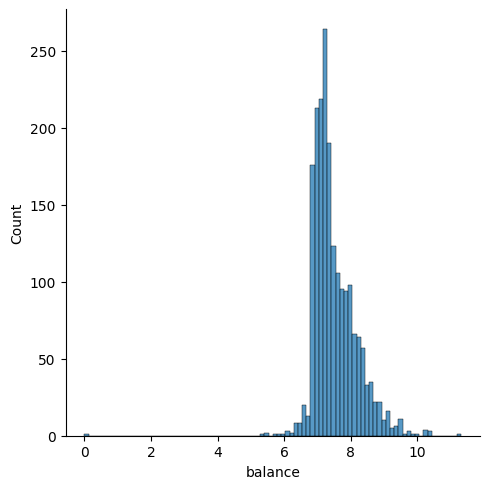

In [70]:
sns.displot(df_copy['balance'])

In [71]:
robust = RobustScaler()
df_bal = df_copy.copy()
scaled_balance = robust.fit_transform(df_bal['balance'].values.reshape(-1, 1))
scaled_balance_df = pd.DataFrame(scaled_balance, columns=['scaled_balance'])
df_copy = pd.concat([df_bal, scaled_balance_df], axis=1)

df_copy = df_copy.drop(columns=['balance'], axis=1)

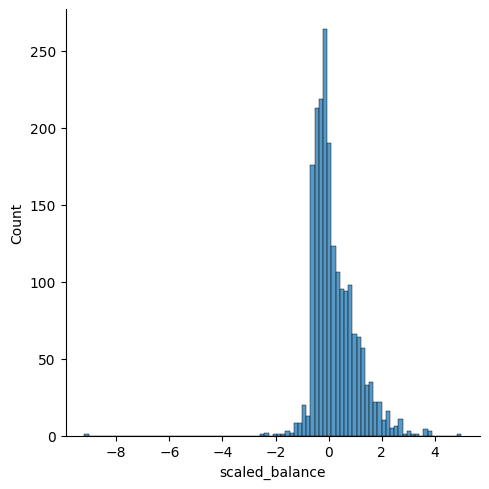

In [72]:
sns.displot(df_copy['scaled_balance'])

In [73]:
scaler = StandardScaler()
scaled_duration = scaler.fit_transform(df_copy['duration'].values.reshape(-1, 1))
scaled_duration_df = pd.DataFrame(scaled_duration, columns=['scaled_duration'])
df_copy = pd.concat([df_copy, scaled_duration_df], axis=1)

df_copy = df_copy.drop(columns=['duration'], axis=1)

In [74]:
df_copy

age  education  default  housing  loan  campaign  pdays  previous  \
0     32.0   1.000000        0        1     0         2    131         2   
1     39.0   0.666667        0        1     1         2    133         1   
2     59.0   0.666667        0        1     1         2    239         1   
3     47.0   0.666667        0        1     1         1    238         2   
4     54.0   0.666667        0        1     0         1    307         1   
...    ...        ...      ...      ...   ...       ...    ...       ...   
1995  20.0   0.000000        0        0     0         2     -1         0   
1996  28.0   0.666667        0        0     0         2     -1         0   
1997  81.0   0.333333        0        0     0         1     -1         0   
1998  46.0   0.333333        0        1     0         1     -1         0   
1999  40.0   0.666667        0        0     0         2     -1         0   

      subscribed   day_sin  ...  job_self-employed  job_services  job_student  \
0              0  0.201299  ...                  0             0            0   
1              0  0.201299  ...                  0             0            0   
2              0  0.201299  ...                  0             0            0   
3              0  0.201299  ...                  0             0            0   
4              0  0.201299  ...                  0             0            0   
...          ...       ...  ...                ...           ...          ...   
1995           1 -0.101168  ...                  0             0            1   
1996           1 -0.101168  ...                  0             0            0   
1997           1 -0.299363  ...                  0             0            0   
1998           1 -0.790776  ...                  0             1            0   
1999           1 -0.968077  ...                  0             0            0   

      job_technician  job_unemployed  marital_divorced  marital_married  \
0                  1               0                 0                0   
1                  1               0                 1                0   
2                  0               0                 0                1   
3                  0               0                 0                1   
4                  0               0                 0                1   
...              ...             ...               ...              ...   
1995               0               0                 0                0   
1996               0               0                 0                0   
1997               0               0                 0                1   
1998               0               0                 0                1   
1999               0               0                 0                1   

      marital_single  scaled_balance  scaled_duration  
0                  1       -0.137375         3.002139  
1                  0        0.107380        -0.266456  
2                  0        0.344192        -0.749522  
3                  0       -0.131908        -0.081356  
4                  0        0.324764         0.844144  
...              ...             ...              ...  
1995               1        1.127625         0.157920  
1996               1       -0.406220         4.704156  
1997               0        0.416093        -0.275485  
1998               0        1.561669        -0.483158  
1999               0        1.971742        -0.379322  

[2000 rows x 29 columns]

### 2e. New Feature

In [86]:
season_mapping = {
    'jan': 'winter',
    'feb': 'winter',
    'mar': 'spring',
    'apr': 'spring',
    'may': 'spring',
    'jun': 'summer',
    'jul': 'summer',
    'aug': 'summer',
    'sep': 'autumn',
    'oct': 'autumn',
    'nov': 'autumn',
    'dec': 'winter'
}

df_season = df.copy()

df_season['season'] = df_season['month'].map(season_mapping)

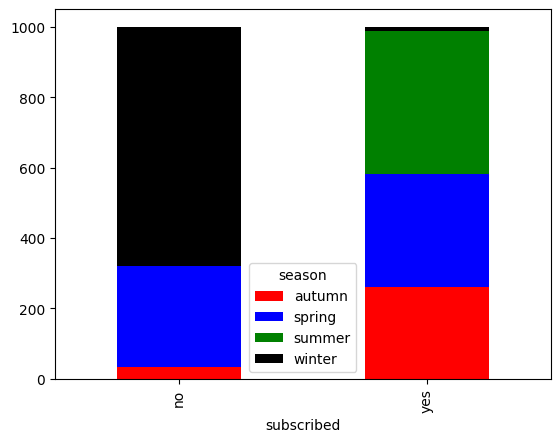

In [95]:
crosstab_SS = pd.crosstab(df_season['subscribed'], df_season['season'])
crosstab_SS.plot(kind='bar', stacked=True, color=['red', 'blue','green', 'black'])
plt.show()

- I have created a seasonal feature based on the month
- Plotting subscribed against the new feature season, gives a new informaiton
- Customers mostly don't subsribe during the winter season, which is a holiday season
- Customers spend on vacations and gifts for families. So, dec, jan, feb are not the proper time